<img src='./fig/vertical_COMILLAS_COLOR.jpg' style= 'width:70mm'>

<h1 style='font-family: Optima;color:#ecac00'>
Máster en Big Data. Tecnología y Analítica Avanzada (MBD).
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Fundamentos Matemáticos del Análisis de Datos (FMAD). 2022-2023.
<a class="tocSkip">
</h1>

<h1 style='font-family: Optima;color:#ecac00'>
Assignment 1
<a class="tocSkip">    
</h1>  

# Preliminaries

+ You are expected to submit your answers using the Jupyter notebook format. If you want to include additional files (data, scripts, figures, etc.) create a zip file containing all the files and email that file to us. 

# Question 1

+ We will be using the data in this file 
[cholesterol.csv](https://gist.githubusercontent.com/fsansegundo/ee991e53e1a571dd34034c42b5516eae/raw/2206455b5772e90c5a2a24a3f42a84408fd1d1c5/cholesterol.csv)  
The data come from a study conducted at the *University of Virginia School of Medicine* dealing with the prevalence of obesity, diabetes and other risk factors for heart disease. You can find further information about the study using this link
[https://biostat.app.vumc.org/wiki/pub/Main/DataSets/diabetes.html](https://biostat.app.vumc.org/wiki/pub/Main/DataSets/diabetes.html)  

+ Load the data set into a pandas DataFrame called `chlstrl`.

+ Gather some basic information about the data set: how many observations are there, what are the variables and their types,...

+ Check for missing data.

+ The exploratory analysis should cover all types of variables in this table. That is, you should *at least* study one variable for each type of variable present in the table. The analysis shoould contain:
  - For quantitative variables (continuous or discrete):  
    - Basic numeric summary (mean, median, quartiles, sd).  
    - Graphics (the right ones for that type of data, possibly more than one graph per variable).  
  - For factors :  
    - Frecuency tables (absolute and relative).  
    - Grafics (bar plot).  

+ The `height` and `weight` variables are expressed in inches) and pounds respectively. One pound is $\approx$ 0.454kg and an inch is $\approx$ 0.0254m.  Use pandas to convert those columns to meters and kilograms respectively.  The new columns should replace the originals. 

+ Using those values of `height` and `weight` add a new column called `BMI`, defined through:
$$BMI = \dfrac{weight}{height^2}$$
 

+ Create a new column called `ageGroup` dividing (binning) age in these three levels:
  ```
    (10,40], (40,70], (70,100]
  ```

+ Find out how many observations are there for each level of `ageGroup`. Now, using only observations corresponding to women, , what is the mean of cholesterol level and BMI for each of those age groups?


# Exercise resolution: Question 1
## Imports section

In [67]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataframe
+ Load the data set into a pandas DataFrame called `chlstrl`.

In [68]:
chlstrl = pd.read_csv("https://gist.githubusercontent.com/fsansegundo/ee991e53e1a571dd34034c42b5516eae/raw/2206455b5772e90c5a2a24a3f42a84408fd1d1c5/cholesterol.csv")
# Show the first 10 rows
chlstrl.head(10)

,chol,age,gender,height,weight,waist,hip
0,203.0,46,female,62.0,121.0,29.0,38.0
1,165.0,29,female,64.0,218.0,46.0,48.0
2,228.0,58,female,61.0,256.0,49.0,57.0
3,78.0,67,male,67.0,119.0,33.0,38.0
4,249.0,64,male,68.0,183.0,44.0,41.0
5,248.0,34,male,71.0,190.0,36.0,42.0
6,195.0,30,male,69.0,191.0,46.0,49.0
7,227.0,37,male,59.0,170.0,34.0,39.0
8,177.0,45,male,69.0,166.0,34.0,40.0
9,263.0,55,female,63.0,202.0,45.0,50.0


### Data analysis
+ Gather some basic information about the data set: how many observations are there, what are the variables and their types,...


In [20]:
print("Information about the variable names and their types")
print(chlstrl.columns)

Information about the variable names and their types
Index(['chol', 'age', 'gender', 'height', 'weight', 'waist', 'hip'], dtype='object')


In [21]:
chlstrl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   chol    402 non-null    float64
 1   age     403 non-null    int64  
 2   gender  403 non-null    object 
 3   height  398 non-null    float64
 4   weight  402 non-null    float64
 5   waist   401 non-null    float64
 6   hip     401 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.2+ KB


In [22]:
print("Dataset size: ", chlstrl.shape)

Dataset size:  (403, 7)


In [23]:
print("Some details about the columns of our dataframe:")
chlstrl.describe()

Some details about the columns of our dataframe:


,chol,age,height,weight,waist,hip
count,402.000000,403.000000,398.000000,402.000000,401.000000,401.000000
mean,207.845771,46.851117,66.020101,177.592040,37.900249,43.039900
std,44.445557,16.312333,3.918515,40.340666,5.729313,5.656713
min,78.000000,19.000000,52.000000,99.000000,26.000000,30.000000
25%,179.000000,34.000000,63.000000,151.000000,33.000000,39.000000
50%,204.000000,45.000000,66.000000,172.500000,37.000000,42.000000
75%,230.000000,60.000000,69.000000,200.000000,41.000000,46.000000
max,443.000000,92.000000,76.000000,325.000000,56.000000,64.000000


### Checking for missing or null values

In [78]:
#Primero localizarlos, luego ya sumar y eliminar
Nan=chlstrl.isnull().values.any()
print(f"Is there any box empty: {Nan}")
por_columna=chlstrl.isnull().sum()
print(f"The amount of data that is missing in each column can be seen in this table: {por_columna}")
posicion_fila=chlstrl[chlstrl.isnull().any(1)]
posicion_fila=posicion_fila.index
print(posicion_fila)
chlstrl.isnull().any(True)


Is there any box empty: True
The amount of data that is missing in each column can be seen in this table: chol      1
age       0
gender    0
height    5
weight    1
waist     2
hip       2
dtype: int64
Int64Index([27, 63, 86, 161, 195, 231, 317, 336, 393], dtype='int64')


0      False
1      False
2      False
3      False
4      False
       ...  
398    False
399    False
400    False
401    False
402    False
Length: 403, dtype: bool

In [25]:
count_nan = chlstrl.isnull().sum().sum()

print ('Count of NaN: ' + str(count_nan))

Count of NaN: 11


In [26]:
# Clean the dataset to drop the rows with NAN values
chlstrl = chlstrl.dropna()

count_nan = chlstrl.isnull().sum().sum()
print ('Count of NaN: ' + str(count_nan))
print("Shape after cleaning the dataset: " + str(chlstrl.shape))

Count of NaN: 0
Shape after cleaning the dataset: (394, 7)


### Exploratory analysis

+ The exploratory analysis should cover all types of variables in this table. That is, you should *at least* study one variable for each type of variable present in the table. The analysis shoould contain:

#### Quantitative variables (continuous, discrete): 
   - Basic numeric summary (mean, median, quartiles, sd).  
   - Graphics (the right ones for that type of data, possibly more than one graph per variable).  
    

#### Analizing *Age* vairable

In [27]:
print("Minimum and maximum age of the dataset:\n")
print("\t - Minimum: " + str(chlstrl["age"].min()))
print("\n\t - Maximum: " + str(chlstrl["age"].max()))

Minimum and maximum age of the dataset:

	 - Minimum: 19

	 - Maximum: 92


In [28]:
print("Calculation of mean, median and range for age variable. \n") 
print("\t - Mean: " + str(chlstrl["age"].mean()))
print("\n\t - Median: " + str(np.median(chlstrl["age"])))
print("\n\t - Range: ", np.ptp(chlstrl["age"]))

Calculation of mean, median and range for age variable. 

	 - Mean: 46.921319796954315

	 - Median: 45.0

	 - Range:  73


In [29]:
print("Calculation of quartiles for age variable: " + str(np.quantile(chlstrl["age"], [0.25, 0.5, 0.75])))
print("\nInterquartilic range for age variable: " + str(stats.iqr(chlstrl["age"])))

Calculation of quartiles for age variable: [34. 45. 60.]

Interquartilic range for age variable: 26.0


In [30]:
print("Table of absolute frequencies of the variable age:")

AbsFreq_chlstrl_age = chlstrl['age'].value_counts().sort_index()
AbsFreq_chlstrl_age

Table of absolute frequencies of the variable age:


19     2
20    10
21     6
22     5
23     7
      ..
83     1
84     1
89     1
91     1
92     1
Name: age, Length: 68, dtype: int64

In [31]:
print("Table of relative frequencies of the variable age:")

RelFreq_chlstrl_age = chlstrl['age'].value_counts(normalize = True).sort_index()
RelFreq_chlstrl_age

Table of relative frequencies of the variable age:


19    0.005076
20    0.025381
21    0.015228
22    0.012690
23    0.017766
        ...   
83    0.002538
84    0.002538
89    0.002538
91    0.002538
92    0.002538
Name: age, Length: 68, dtype: float64

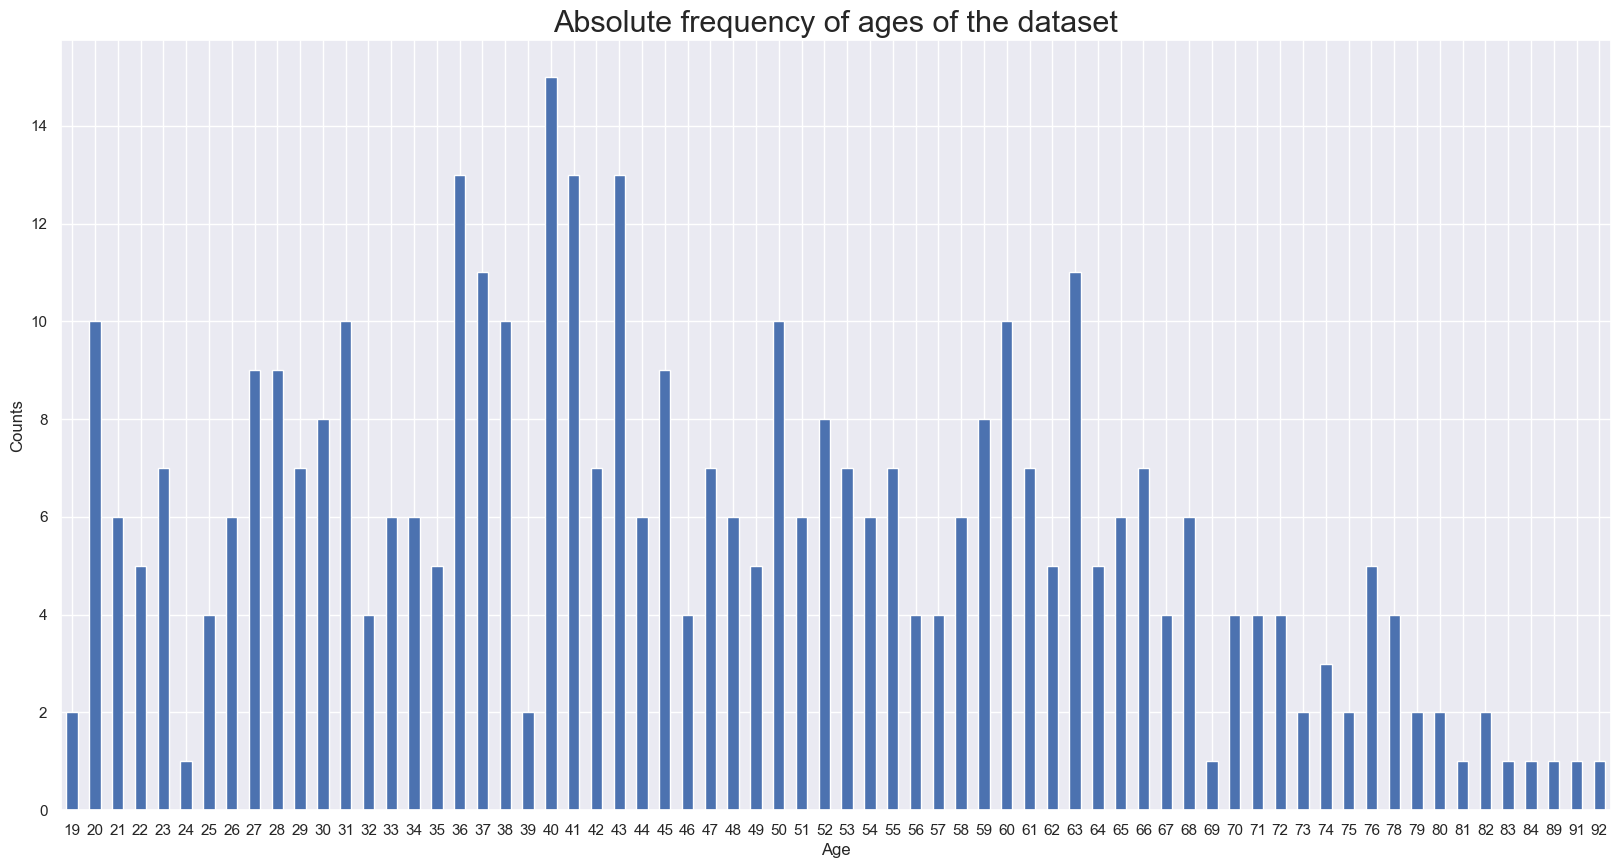

In [32]:
sns.set(rc={'figure.figsize':(20,10)})
plot = AbsFreq_chlstrl_age.plot.bar(rot=0, xlabel='Age', ylabel ='Counts')
getPlot = plot.set_title("Absolute frequency of ages of the dataset",  fontdict={'fontsize': 22})

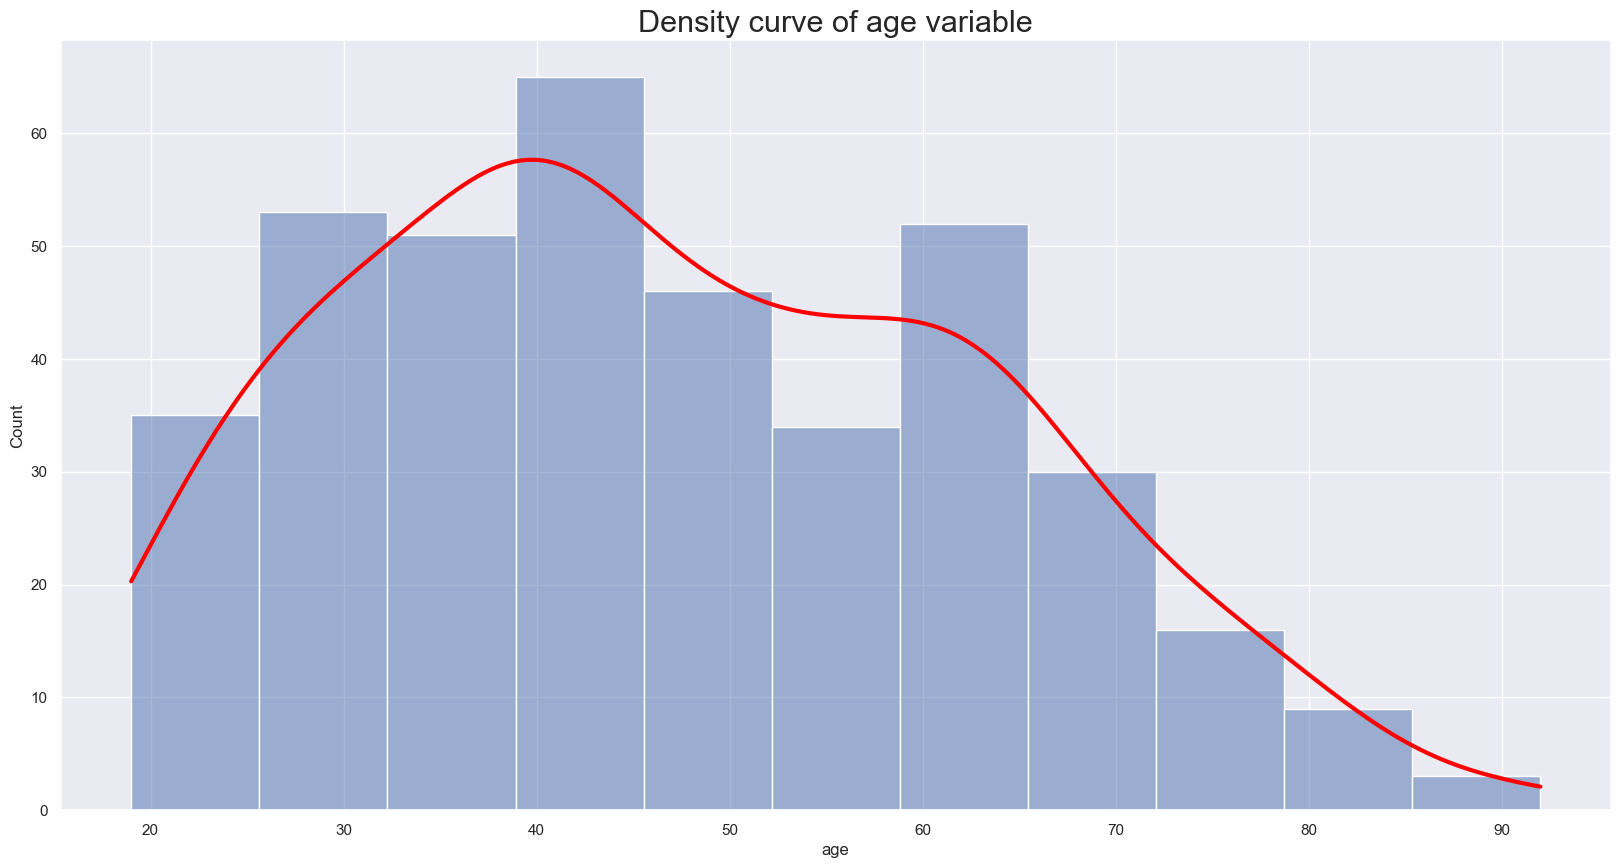

In [33]:
dens_plot = sns.histplot(data = chlstrl, x = 'age', kde=True)
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)
getPlot = dens_plot.set_title("Density curve of age variable",  fontdict={'fontsize': 22})

These plots show the representation of the distribution of the data of the variable age. 

In the first one, the distribution of the relative frequency can be seen by means of a bar chart. 

In the second one, we can observe the density curve of the variable, noting that there is a greater number of samples of people between 30 and 50 years of age.

#### Analizing *Height* vairable

In [34]:
print("Minimum and maximum height of the dataset:\n")
print("\t - Minimum: " + str(chlstrl["height"].min()))
print("\n\t - Maximum: " + str(chlstrl["height"].max()))

Minimum and maximum height of the dataset:

	 - Minimum: 52.0

	 - Maximum: 76.0


In [35]:
print("Calculation of mean, median and range for Height variable. \n") 
print("\t - Mean: " + str(chlstrl["height"].mean()))
print("\n\t - Median: " + str(np.median(chlstrl["height"])))
print("\n\t - Range: ", np.ptp(chlstrl["height"]))

Calculation of mean, median and range for Height variable. 

	 - Mean: 66.02030456852792

	 - Median: 66.0

	 - Range:  24.0


In [36]:
print("Calculation of quartiles for height variable: " + str(np.quantile(chlstrl["height"], [0.25, 0.5, 0.75])))
print("\nInterquartilic range for height variable: " + str(stats.iqr(chlstrl["height"])))

Calculation of quartiles for height variable: [63. 66. 69.]

Interquartilic range for height variable: 6.0


In [37]:
print("Table of absolute frequencies of the variable height:")

AbsFreq_chlstrl_height = chlstrl['height'].value_counts().sort_index()
AbsFreq_chlstrl_height

Table of absolute frequencies of the variable height:


52.0     1
55.0     1
56.0     1
58.0     3
59.0     9
60.0    10
61.0    19
62.0    31
63.0    43
64.0    33
65.0    32
66.0    35
67.0    36
68.0    25
69.0    36
70.0    24
71.0    22
72.0    14
73.0     8
74.0     5
75.0     4
76.0     2
Name: height, dtype: int64

In [38]:
print("Table of relative frequencies of the variable height:")

RelFreq_chlstrl_height = chlstrl['height'].value_counts(normalize = True).sort_index()
RelFreq_chlstrl_height

Table of relative frequencies of the variable height:


52.0    0.002538
55.0    0.002538
56.0    0.002538
58.0    0.007614
59.0    0.022843
60.0    0.025381
61.0    0.048223
62.0    0.078680
63.0    0.109137
64.0    0.083756
65.0    0.081218
66.0    0.088832
67.0    0.091371
68.0    0.063452
69.0    0.091371
70.0    0.060914
71.0    0.055838
72.0    0.035533
73.0    0.020305
74.0    0.012690
75.0    0.010152
76.0    0.005076
Name: height, dtype: float64

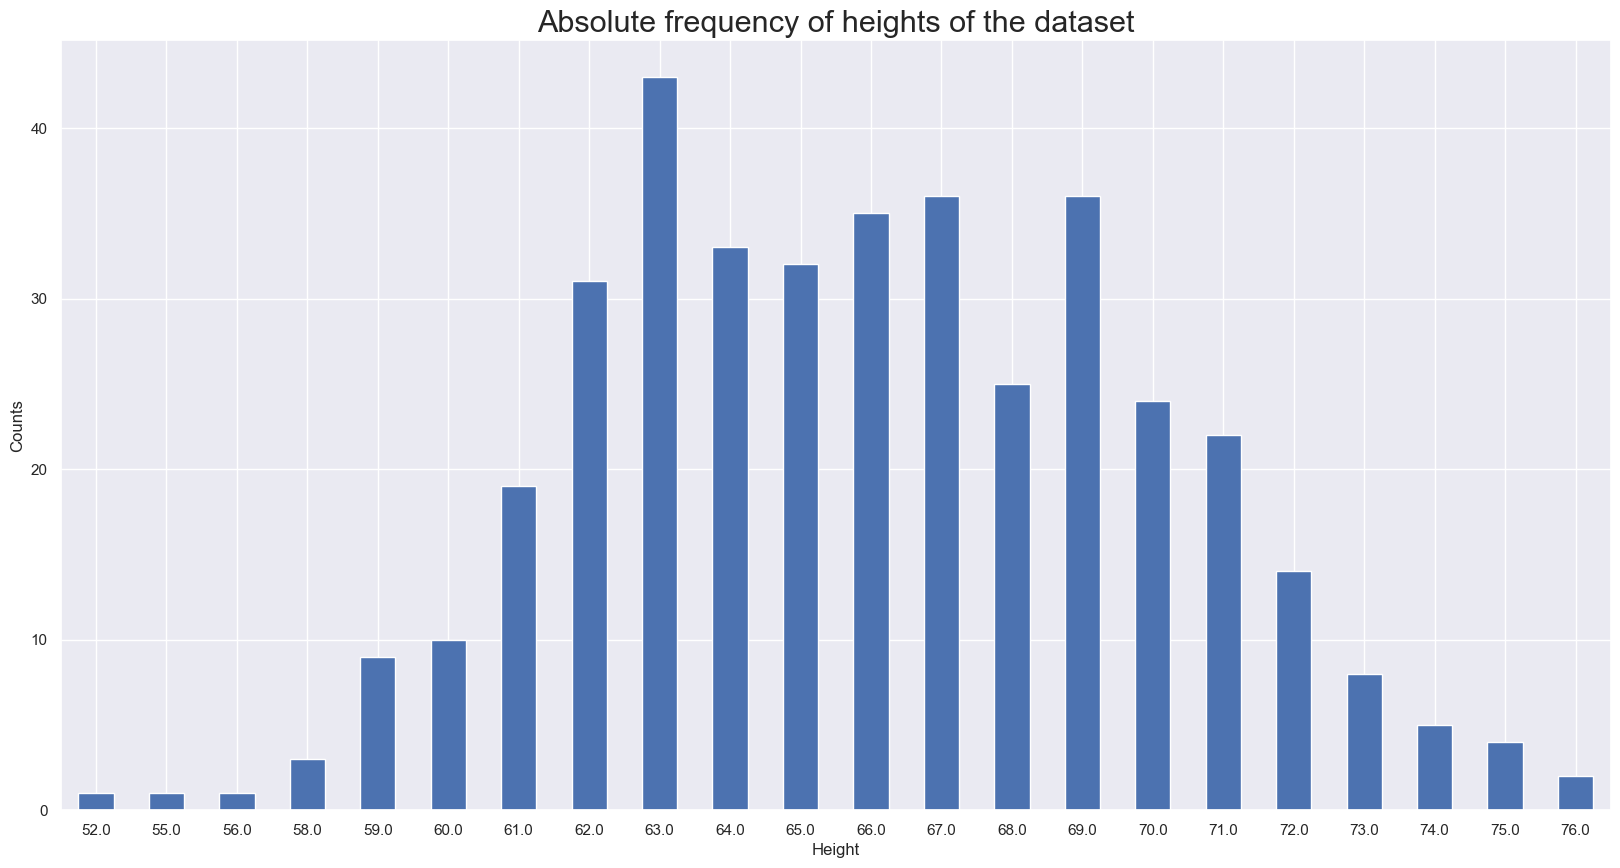

In [39]:
sns.set(rc={'figure.figsize':(20,10)})
plot = AbsFreq_chlstrl_height.plot.bar(rot=0, xlabel='Height', ylabel ='Counts')
getPlot = plot.set_title("Absolute frequency of heights of the dataset",  fontdict={'fontsize': 22})

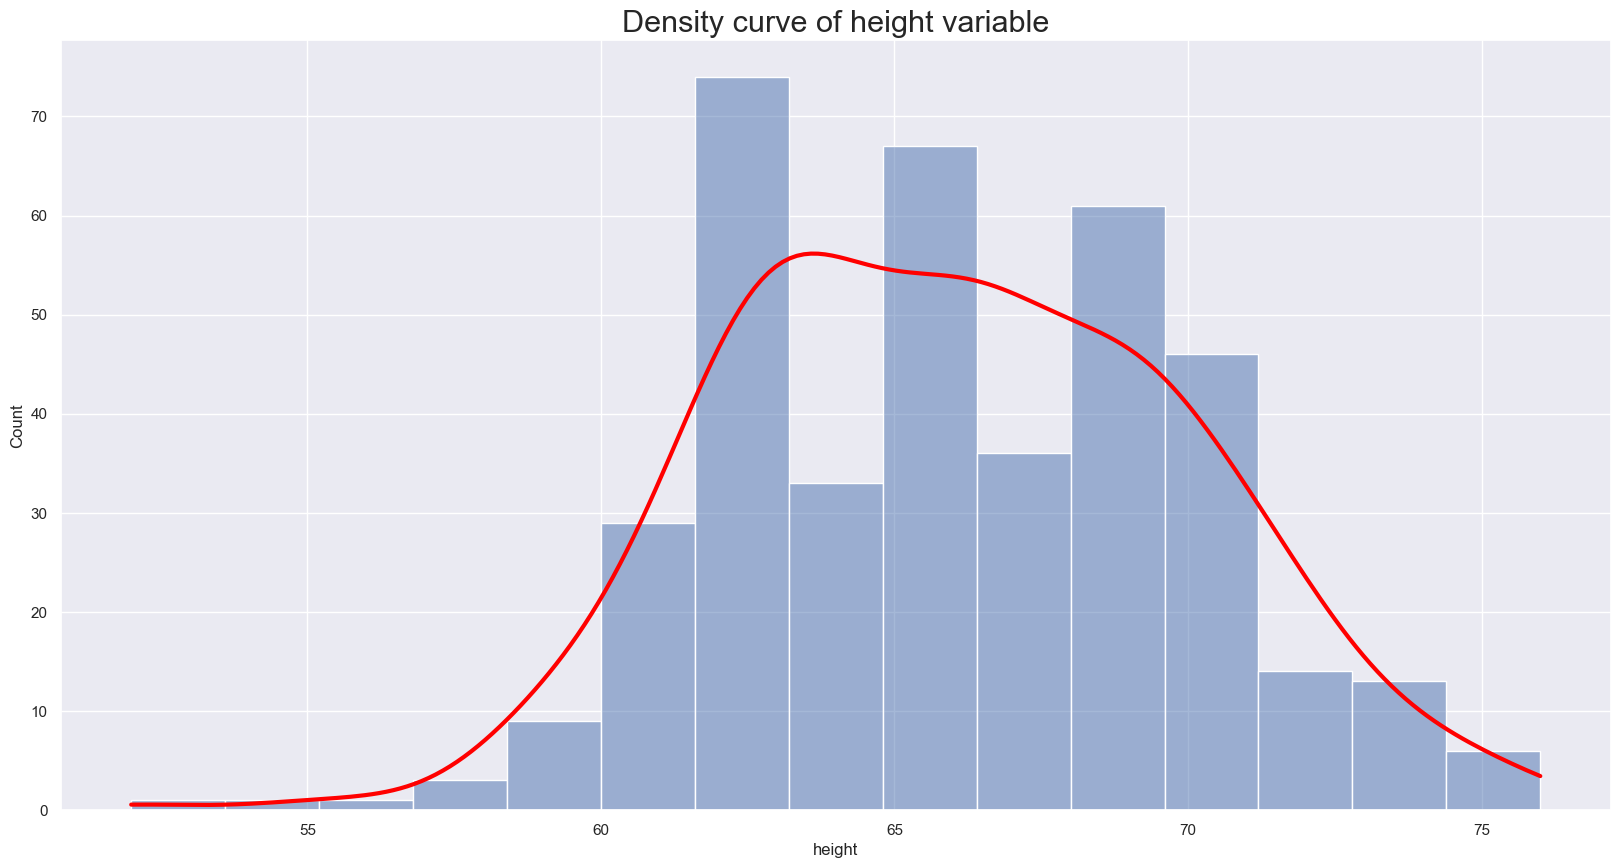

In [40]:
dens_plot = sns.histplot(data = chlstrl, x = 'height', kde=True)
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)
getPlot = dens_plot.set_title("Density curve of height variable",  fontdict={'fontsize': 22})

These graphs show the representation of the distribution of the data of the height variable. 

In the first one, we can observe a bar chart showing the distribution of the absolute frequency of the variable.

In the second one, we can observe the density curve of the variable.

#### Analizing *weight* vairable

In [41]:
print("Minimum and maximum weight of the dataset:\n")
print("\t - Minimum: " + str(chlstrl["weight"].min()))
print("\n\t - Maximum: " + str(chlstrl["weight"].max()))

Minimum and maximum weight of the dataset:

	 - Minimum: 99.0

	 - Maximum: 325.0


In [42]:
print("Calculation of mean, median and range for weight variable. \n") 
print("\t - Mean: " + str(chlstrl["weight"].mean()))
print("\n\t - Median: " + str(np.median(chlstrl["weight"])))
print("\n\t - Range: ", np.ptp(chlstrl["weight"]))

Calculation of mean, median and range for weight variable. 

	 - Mean: 178.13197969543148

	 - Median: 173.5

	 - Range:  226.0


In [43]:
print("Calculation of quartiles for weight variable: " + str(np.quantile(chlstrl["weight"], [0.25, 0.5, 0.75])))
print("\nInterquartilic range for weight variable: " + str(stats.iqr(chlstrl["weight"])))

Calculation of quartiles for weight variable: [151.25 173.5  200.  ]

Interquartilic range for weight variable: 48.75


In [44]:
print("Table of absolute frequencies of the variable weight:")

AbsFreq_chlstrl_weight = chlstrl['weight'].value_counts().sort_index()
AbsFreq_chlstrl_weight

Table of absolute frequencies of the variable weight:


99.0     1
102.0    1
105.0    2
109.0    1
110.0    2
        ..
289.0    1
290.0    1
308.0    1
320.0    1
325.0    1
Name: weight, Length: 139, dtype: int64

In [45]:
print("Table of relative frequencies of the variable weight:")

RelFreq_chlstrl_weight = chlstrl['weight'].value_counts(normalize = True).sort_index()
RelFreq_chlstrl_weight

Table of relative frequencies of the variable weight:


99.0     0.002538
102.0    0.002538
105.0    0.005076
109.0    0.002538
110.0    0.005076
           ...   
289.0    0.002538
290.0    0.002538
308.0    0.002538
320.0    0.002538
325.0    0.002538
Name: weight, Length: 139, dtype: float64

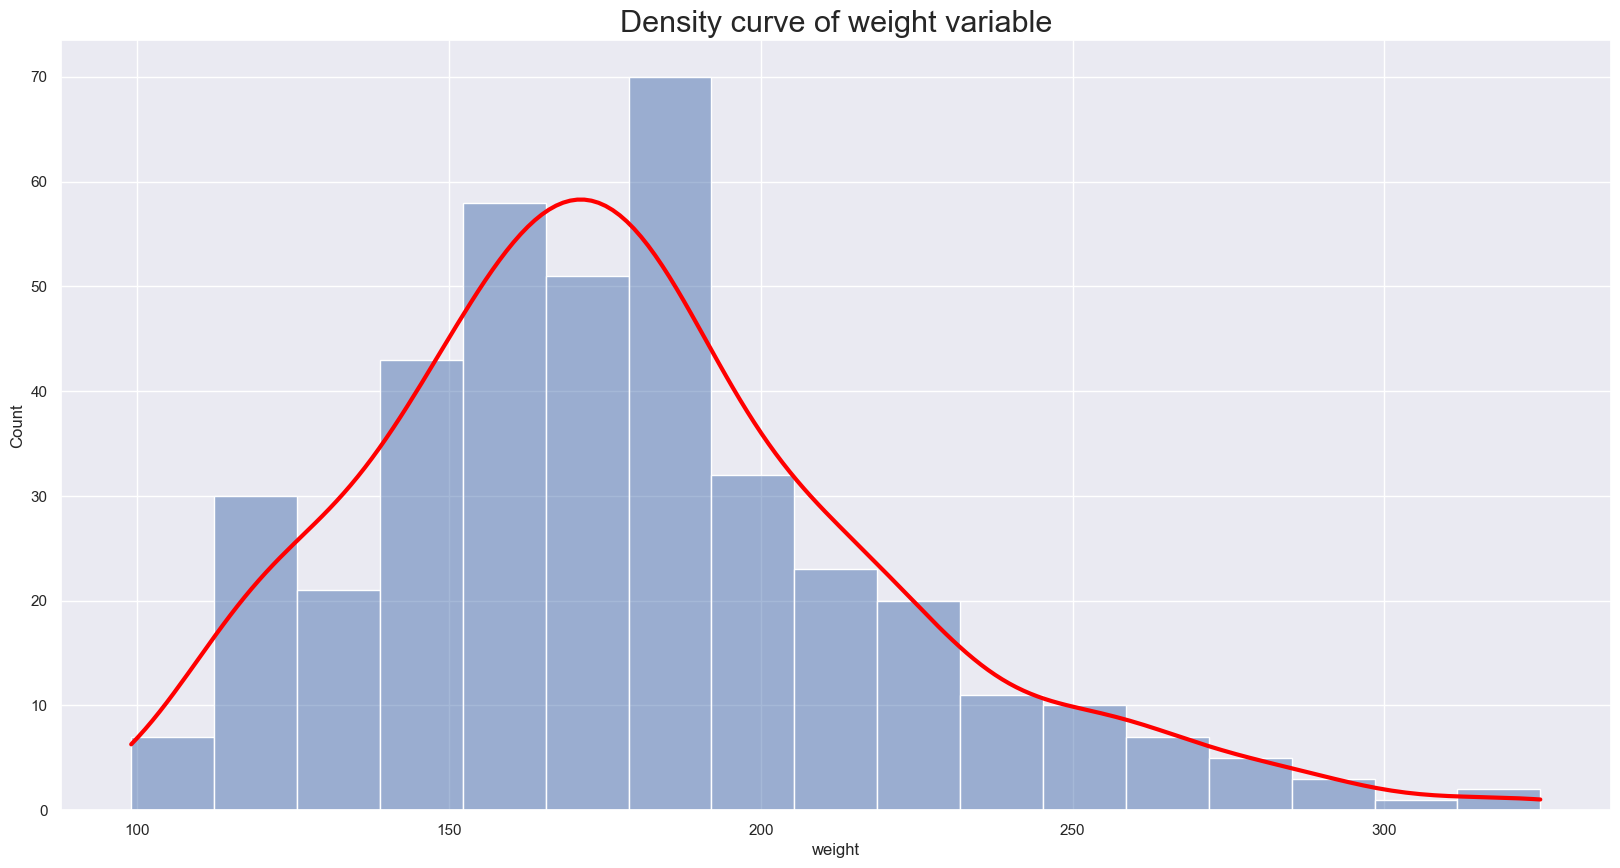

In [46]:
dens_plot = sns.histplot(data = chlstrl, x = 'weight', kde=True)
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)
getPlot = dens_plot.set_title("Density curve of weight variable",  fontdict={'fontsize': 22})

In this graph we can see the density curve, as well as the distribution of the data of the weight variable.

#### Analizing *Cholesterol* vairable

In [47]:
print("Minimum and maximum cholesterol of the dataset:\n")
print("\t - Minimum: " + str(chlstrl["chol"].min()))
print("\n\t - Maximum: " + str(chlstrl["chol"].max()))

Minimum and maximum cholesterol of the dataset:

	 - Minimum: 78.0

	 - Maximum: 443.0


In [48]:
print("Calculation of mean, median and range for cholesterol variable. \n") 
print("\t - Mean: " + str(chlstrl["chol"].mean()))
print("\n\t - Median: " + str(np.median(chlstrl["chol"])))
print("\n\t - Range: ", np.ptp(chlstrl["chol"]))

Calculation of mean, median and range for cholesterol variable. 

	 - Mean: 208.22081218274113

	 - Median: 204.0

	 - Range:  365.0


In [49]:
print("Table of absolute frequencies of the variable cholesterol:")

AbsFreq_chlstrl_chol = chlstrl['chol'].value_counts().sort_index()
AbsFreq_chlstrl_chol

Table of absolute frequencies of the variable cholesterol:


78.0     1
118.0    1
122.0    1
128.0    1
129.0    1
        ..
337.0    1
342.0    1
347.0    1
404.0    1
443.0    1
Name: chol, Length: 153, dtype: int64

In [50]:
print("Table of relative frequencies of the variable cholesterol:")

RelFreq_chlstrl_chol = chlstrl['chol'].value_counts(normalize = True).sort_index()
RelFreq_chlstrl_chol

Table of relative frequencies of the variable cholesterol:


78.0     0.002538
118.0    0.002538
122.0    0.002538
128.0    0.002538
129.0    0.002538
           ...   
337.0    0.002538
342.0    0.002538
347.0    0.002538
404.0    0.002538
443.0    0.002538
Name: chol, Length: 153, dtype: float64

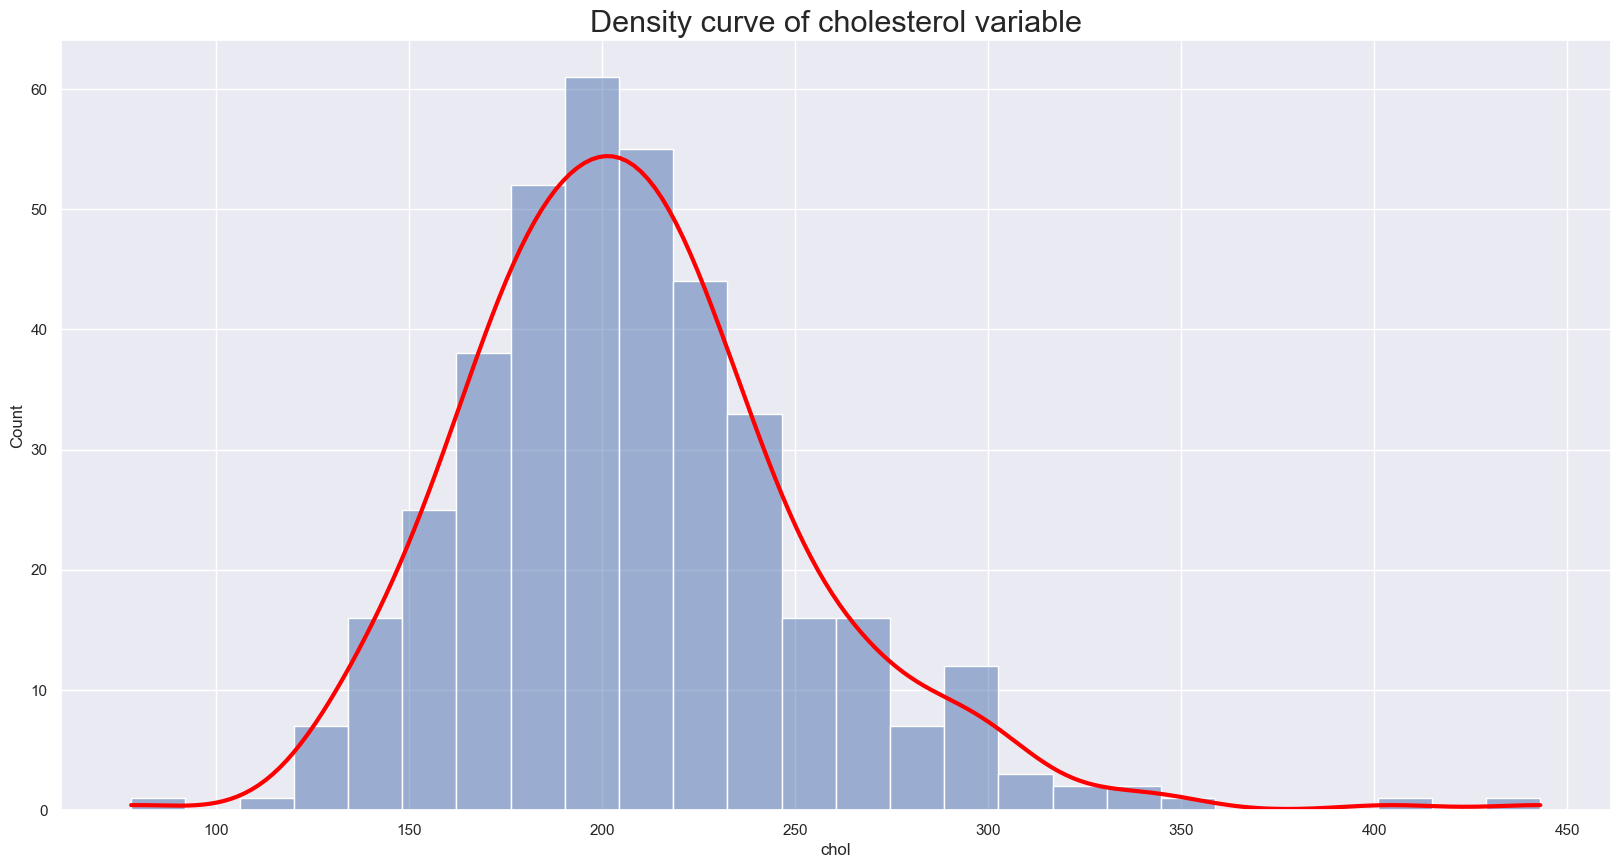

In [51]:
dens_plot = sns.histplot(data = chlstrl, x = 'chol', kde=True)
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)
getPlot = dens_plot.set_title("Density curve of cholesterol variable",  fontdict={'fontsize': 22})

In this graph we can see the density curve, as well as the distribution of the data of the cholesterol variable.

### Summary of the analysis of the most significant variables in the dataset 

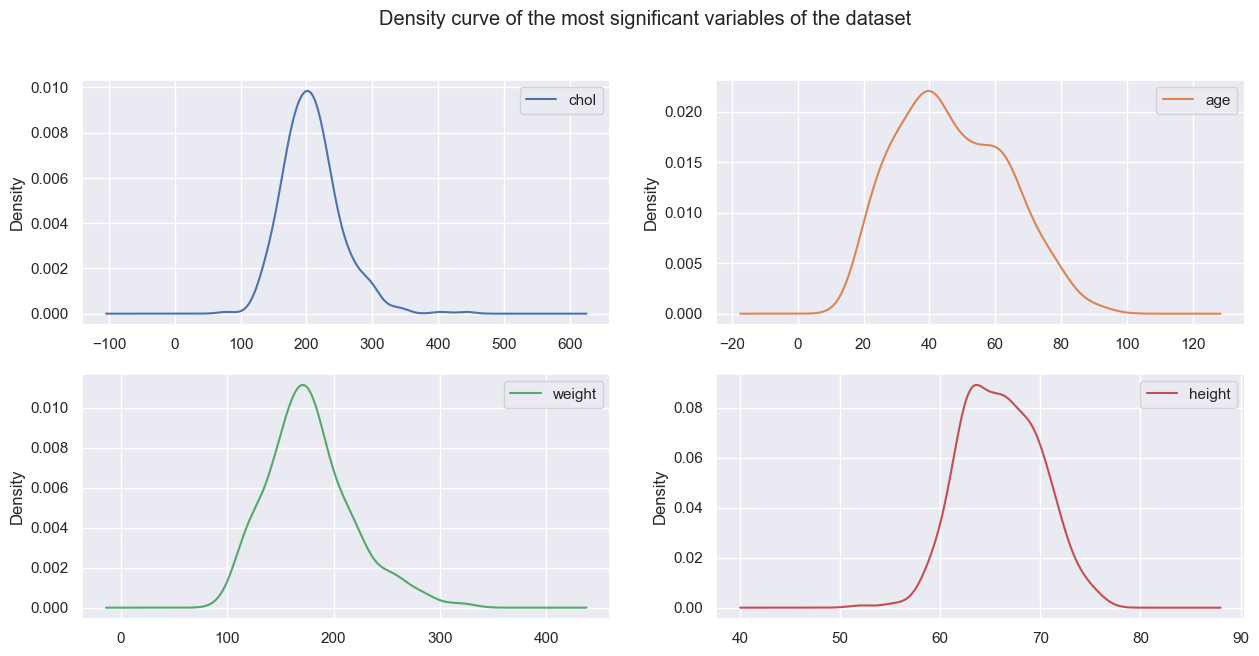

In [52]:
plt.rcParams['figure.figsize'] = [15, 7]

densities = chlstrl.loc[:, ['chol', 'age', 'weight', 'height']].plot.density(
    subplots=True, layout=(2,2), sharex=False,sharey=False,
    title = "Density curve of the most significant variables of the dataset")


In these plots we can compare the density curve of the most significant variables of the dataset. In this way, we can compare them and check how their distribution is.

### Factors
  - For factors $\rightarrow$ **Gender**  
    - Frecuency tables (absolute and relative).  
    - Grafics (bar plot). 

In [53]:
# Absolute frequency table
print("Absolute frequency table for gender variable: ")
chlstrl.gender.value_counts().sort_index()

Absolute frequency table for gender variable: 


female    228
male      166
Name: gender, dtype: int64

In [54]:
# Relative frequency table
print("Relative frequency table for gender variable: ")
chlstrl.gender.value_counts(normalize = True).sort_index()

Relative frequency table for gender variable: 


female    0.57868
male      0.42132
Name: gender, dtype: float64

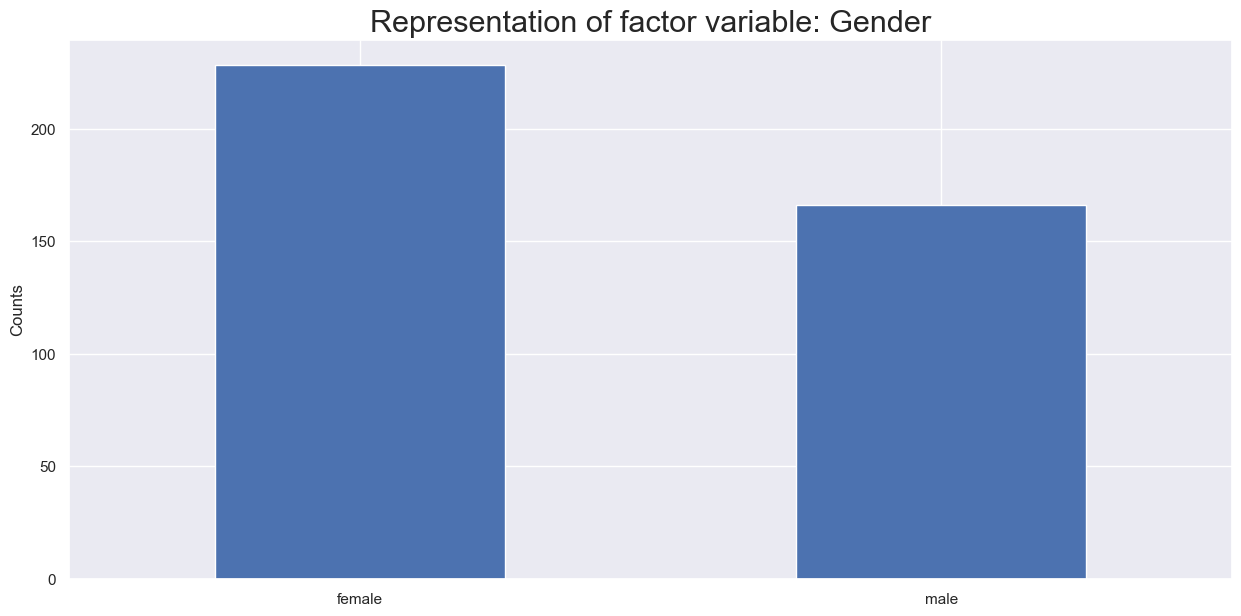

In [55]:
sns.set()
plot = chlstrl.gender.value_counts().plot.bar(rot=0, ylabel ='Counts')
getPlot = plot.set_title("Representation of factor variable: Gender",  fontdict={'fontsize': 22})

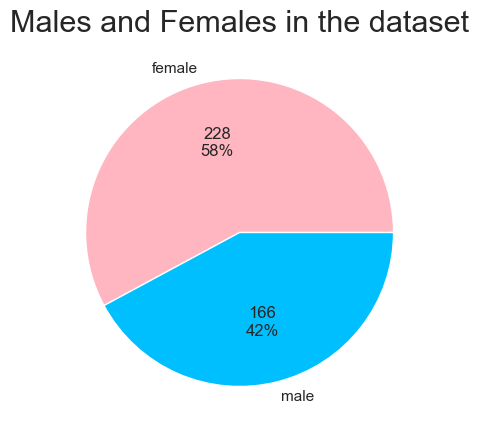

In [56]:
def labelling(val):
    return f'{val / 100 * len(chlstrl):.0f}\n{val:.0f}%'

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
chlstrl.groupby("gender").size().plot(kind="pie", autopct=labelling, colors=['lightpink','deepskyblue'])
ax1.set_ylabel("")
# Cambiar título.
ax1.set_title("Males and Females in the dataset",  fontdict={'fontsize': 22})

plt.show()

These two plots show us the number of women and men in the dataset. 

We can see that there are 58% of women versus 42% of men. 

Both graphs show the same comparison, although in the second one we can see better the proportion of women versus men in our dataset.

### Converting data
+ The height and weight variables are expressed in inches and pounds respectively. One pound is  ≈  0.454kg and an inch is  ≈  0.0254m. Use pandas to convert those columns to meters and kilograms respectively. The new columns should replace the originals.

In [57]:
chlstrl["height"] = chlstrl["height"]*0.0254
chlstrl["weight"] = chlstrl["weight"]*0.454
chlstrl

,chol,age,gender,height,weight,waist,hip
0,203.0,46,female,1.5748,54.934,29.0,38.0
1,165.0,29,female,1.6256,98.972,46.0,48.0
2,228.0,58,female,1.5494,116.224,49.0,57.0
3,78.0,67,male,1.7018,54.026,33.0,38.0
4,249.0,64,male,1.7272,83.082,44.0,41.0
...,...,...,...,...,...,...,...
398,296.0,53,male,1.7526,78.542,35.0,39.0
399,284.0,51,female,1.6002,69.916,32.0,43.0
400,194.0,29,female,1.7526,75.818,33.0,40.0
401,199.0,41,female,1.6002,89.438,41.0,48.0


### Calculating BMI
+ Using those values of `height` and `weight` add a new column called `BMI`, defined through:
$$BMI = \dfrac{weight}{height^2}$$

In [58]:
chlstrl["BMI"] = chlstrl["weight"]/(chlstrl["height"]**2)
chlstrl

,chol,age,gender,height,weight,waist,hip,BMI
0,203.0,46,female,1.5748,54.934,29.0,38.0,22.150851
1,165.0,29,female,1.6256,98.972,46.0,48.0,37.452858
2,228.0,58,female,1.5494,116.224,49.0,57.0,48.413749
3,78.0,67,male,1.7018,54.026,33.0,38.0,18.654593
4,249.0,64,male,1.7272,83.082,44.0,41.0,27.849775
...,...,...,...,...,...,...,...,...
398,296.0,53,male,1.7526,78.542,35.0,39.0,25.570330
399,284.0,51,female,1.6002,69.916,32.0,43.0,27.304111
400,194.0,29,female,1.7526,75.818,33.0,40.0,24.683498
401,199.0,41,female,1.6002,89.438,41.0,48.0,34.927986


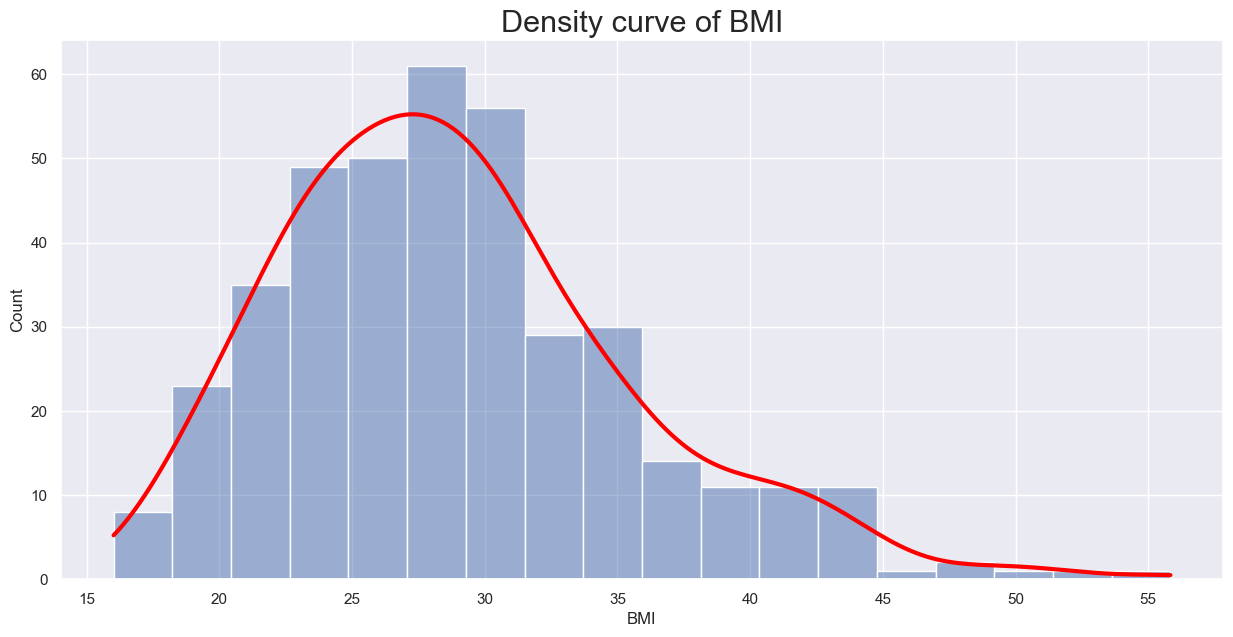

In [59]:
dens_plot = sns.histplot(data = chlstrl, x = 'BMI', kde=True)
dens_plot.lines[0].set_color('red')
dens_plot.lines[0].set_linewidth(3)
getPlot = dens_plot.set_title("Density curve of BMI",  fontdict={'fontsize': 22})

In this plot we can see the density curve, as well as the distribution of the data of the BMI variable that we have just calculated.

### Binning data
+ Create a new column called `ageGroup` dividing (binning) age in these three levels:
  ```
      (10,40], (40,70], (70,100]
  ```
    

In [60]:
C_nodes = [10,40,70,100]
chlstrl["ageGroup"] = pd.cut(chlstrl.age, bins=C_nodes, ordered=True)
chlstrl

,chol,age,gender,height,weight,waist,hip,BMI,ageGroup
0,203.0,46,female,1.5748,54.934,29.0,38.0,22.150851,"(40, 70]"
1,165.0,29,female,1.6256,98.972,46.0,48.0,37.452858,"(10, 40]"
2,228.0,58,female,1.5494,116.224,49.0,57.0,48.413749,"(40, 70]"
3,78.0,67,male,1.7018,54.026,33.0,38.0,18.654593,"(40, 70]"
4,249.0,64,male,1.7272,83.082,44.0,41.0,27.849775,"(40, 70]"
...,...,...,...,...,...,...,...,...,...
398,296.0,53,male,1.7526,78.542,35.0,39.0,25.570330,"(40, 70]"
399,284.0,51,female,1.6002,69.916,32.0,43.0,27.304111,"(40, 70]"
400,194.0,29,female,1.7526,75.818,33.0,40.0,24.683498,"(10, 40]"
401,199.0,41,female,1.6002,89.438,41.0,48.0,34.927986,"(40, 70]"


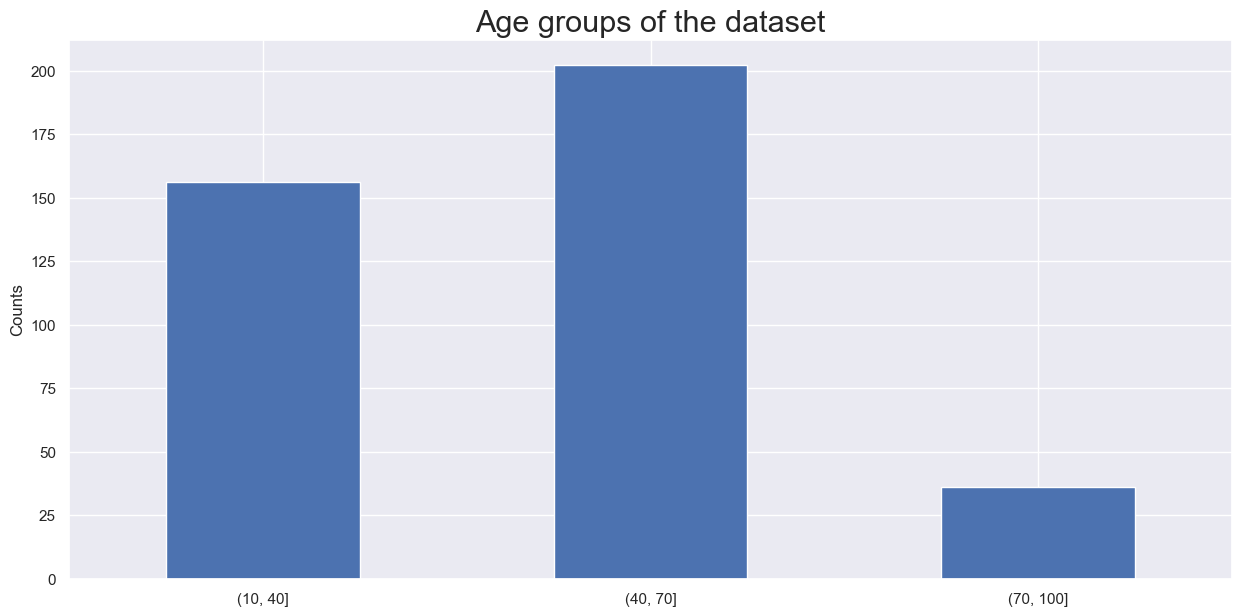

In [61]:
plot = chlstrl["ageGroup"].value_counts().sort_index().plot.bar(rot=0, ylabel ='Counts')
getPlot = plot.set_title("Age groups of the dataset", fontdict={'fontsize': 22})

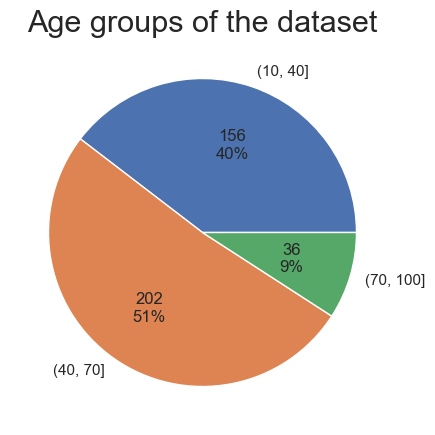

In [62]:
def labelling(val):
    return f'{val / 100 * len(chlstrl):.0f}\n{val:.0f}%'

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
chlstrl.groupby("ageGroup").size().plot(kind="pie", autopct=labelling)
ax1.set_ylabel("")
# Cambiar título.
ax1.set_title("Age groups of the dataset",  fontdict={'fontsize': 22})

plt.show()

This graph shows the comparison of the age groups in the dataset. As we have done with the gender, the comparison can be seen in a better way in the pie chart.


### Analyzing the dataset for women by age group
+ Find out how many observations are there for each level of `ageGroup`. Now, using only observations corresponding to women, what is the mean of cholesterol level and BMI for each of those age groups?


In [63]:
# Observations => Frequecy for each group of ages
chlstrl["ageGroup"].value_counts().sort_index()

(10, 40]     156
(40, 70]     202
(70, 100]     36
Name: ageGroup, dtype: int64

In [64]:
chlstrl_female = chlstrl.loc[chlstrl.gender == "female"]
chlstrl_female_means = chlstrl_female.groupby(pd.cut(chlstrl_female['age'], C_nodes)).mean()

print("Mean of cholesterol levels by age:\n", chlstrl_female_means["chol"])
print("\n\nMean of BMI by age:\n", chlstrl_female_means["BMI"])

Mean of cholesterol levels by age:
 age
(10, 40]     188.569892
(40, 70]     221.113043
(70, 100]    230.050000
Name: chol, dtype: float64


Mean of BMI by age:
 age
(10, 40]     30.541215
(40, 70]     30.266245
(70, 100]    29.372023
Name: BMI, dtype: float64


In [65]:
# Mejor ponerlo todo junto, como aquí
chlstrl_female.groupby('ageGroup')[['chol', 'BMI']].mean()

,chol,BMI
ageGroup,,
"(10, 40]",188.569892,30.541215
"(40, 70]",221.113043,30.266245
"(70, 100]",230.050000,29.372023
